# 01_EDA

This document presents the Exploratory Data Analysis (EDA) of the `Give Me Some Credit` dataset, in which the main features of the data are examined, investigated, cleaned, and summarized. The analysis aims to provide a comprehensive understanding of the dataset’s structure, identify anomalies and underlying patterns, and formulate initial hypotheses. To achieve this, a combination of descriptive statistics and data visualizations is employed throughout the study.

**How to use:** place `cs-training.csv` in the `data/` folder parallel to this notebook, then run the cells in order. If you use a conda environment, make sure the kernel matches that environment.

# CELL 1. HEADER AND REMOVAL OF COLUMN '0'.

In [1]:
from pathlib import Path
import pandas as pd, numpy as np
pd.set_option('display.max_columns', 100)
DATA_DIR = Path.cwd().parent / "data"  # adjust this path if you put notebook elsewhere
TRAIN_CSV = DATA_DIR / 'cs-training.csv'

if not TRAIN_CSV.exists():
    raise FileNotFoundError(f"Training file not found at {TRAIN_CSV}. Please place cs-training.csv in data/ and re-run.")

creditdb = pd.read_csv(TRAIN_CSV)
# Remove the identifying column
if 'Unnamed: 0' in creditdb.columns:
    creditdb = creditdb.drop(columns=['Unnamed: 0'])

print('Loaded train shape:', creditdb.shape)
creditdb.head(15)

Loaded train shape: (150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


**Explanation:** This cell removes column 0, which was not relevant to the dataset, and displays a summary of the first 15 rows of the validation set.

**Problem:** There is reason to suspect that many of the values in DebtRatio may be unreliable. When MonthlyIncome is missing, the ratio appears to behave incorrectly, producing abnormally high values. It may be advisable to either remove observations with missing MonthlyIncome or apply some form of correction, although the appropriate approach has not yet been determined.

# CELL 2. BASIC INFORMATION, MISSING VALUES, AND TARGET DISTRIBUTION.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

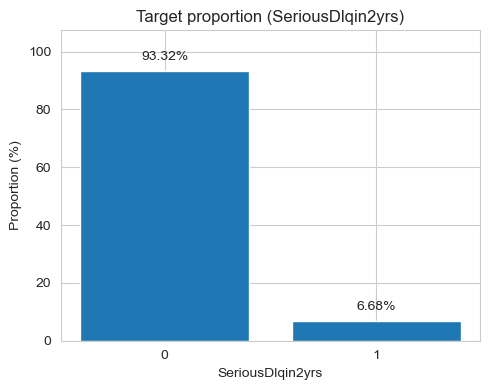

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Minimum Check
if 'creditdb' not in globals():
    raise RuntimeError("No encuentro la variable 'creditdb'. Carga el dataframe antes de ejecutar esta celda.")

# Info and missings
creditdb.info()

# The distribution of the target variable is stored for later use in the plot
print('\nTarget distribution:')
target_prop = creditdb['SeriousDlqin2yrs'].value_counts(dropna=False, normalize=True).sort_index()
display(target_prop.rename('proportion'))

# Barplot of proportion
print('\n')
target_pct = (target_prop * 100)  # in %

fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(target_pct.index.astype(str), target_pct.values)

ax.set_xlabel('SeriousDlqin2yrs')
ax.set_ylabel('Proportion (%)')
ax.set_title('Target proportion (SeriousDlqin2yrs)')
ax.set_ylim(0, max(target_pct.values) * 1.15)  

# A bar plot is generated to display the proportion of each class, with the corresponding percentage annotated above each bar.
for bar in bars:
    h = bar.get_height()
    ax.annotate(f'{h:.2f}%', 
                xy=(bar.get_x() + bar.get_width() / 2, h),
                xytext=(0, 6),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Observations:** The target variable is clearly imbalanced: the vast majority of instances correspond to non-fraud cases. Since the objective of the model is to correctly identify fraudulent cases (rather than simply maximizing overall accuracy) this imbalance is critical. A model that predicts all observations as non-fraud would already achieve over 93% accuracy, which would be of no practical value.

Additionally, approximately 20% of the MonthlyIncome variable is missing, which subsequently affects other variables that depend on it directly or indirectly. There is also a 2.6% absence rate in NumberOfDependents, which could potentially be handled using a KNN imputer. These issues will be addressed in later stages of the analysis.

# MAIN CONCLUSIONS FROM THIS INITIAL EXPLORATION.

Firstly, it becomes evident that in a substantial number of observations, the MonthlyIncome variable is either unknown (approximately 20%, recorded as NaN) or equal to 0. Consequently, in these cases, the DebtRatio variable becomes heavily distorted; while the ratio should theoretically fall within a proportional range between 0 and 1, some observations display values as high as 57,000. These records likely correspond to self-employed individuals (in the case of NaN income) or retirees (in the case of zero income). For the purposes of the main model, these observations are unlikely to be useful, as they would introduce significant imbalance and distort the results. They should therefore be handled separately at a later stage.

Additionally, the target variable (SeriousDlqin2yrs) should be converted to a Boolean type to avoid future complications mapping 0 to False (individuals who have not experienced a serious delinquency in the past two years) and 1 to True (individuals who have).

# CELL 3. REMOVAL OF ENTREPRENEUR AND RETIREE COLUMNS + CONVERSION OF TARGET TO BOOLEAN.

In [3]:
import numpy as np

# initial state
n_before = len(creditdb)
missing_mi = int(creditdb['MonthlyIncome'].isna().sum())
zeros_mi = int((creditdb['MonthlyIncome'] == 0).sum())
print(f"Filas antes: {n_before}")
print(f"MonthlyIncome missing: {missing_mi} ({missing_mi / n_before:.2%})")
print(f"MonthlyIncome == 0   : {zeros_mi} ({zeros_mi / n_before:.2%})")

# filtering: Keep only the rows where MonthlyIncome is neither NaN nor zero
mask = creditdb['MonthlyIncome'].notna() & (creditdb['MonthlyIncome'] != 0)
creditdb = creditdb.loc[mask].copy()   # reasignamos a creditdb limpio

# reset the index for clarity
creditdb.reset_index(drop=True, inplace=True)

# Target Conversion: Convert the target variable to a Boolean type (0 → False, 1 → True)
# Using map ensures an explicit and safe transformation in the presence of unexpected values
creditdb['SeriousDlqin2yrs'] = creditdb['SeriousDlqin2yrs'].map({0: False, 1: True}).astype(bool)

# Final state and checks
n_after = len(creditdb)
removed = n_before - n_after
print("\n--- Resultado del filtrado ---")
print(f"Filas después: {n_after} (eliminadas: {removed} = {removed / n_before:.2%})")

print("\nNueva info (dtypes y non-null counts):")
display(creditdb.info())

print("\nDistribución del target (booleano):")
display(creditdb['SeriousDlqin2yrs'].value_counts(dropna=False, normalize=True).rename('proportion'))

print("\nEstadísticas rápidas de MonthlyIncome tras el filtrado:")
display(creditdb['MonthlyIncome'].describe())

display(creditdb.head(7))

Filas antes: 150000
MonthlyIncome missing: 29731 (19.82%)
MonthlyIncome == 0   : 1634 (1.09%)

--- Resultado del filtrado ---
Filas después: 118635 (eliminadas: 31365 = 20.91%)

Nueva info (dtypes y non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118635 entries, 0 to 118634
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      118635 non-null  bool   
 1   RevolvingUtilizationOfUnsecuredLines  118635 non-null  float64
 2   age                                   118635 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  118635 non-null  int64  
 4   DebtRatio                             118635 non-null  float64
 5   MonthlyIncome                         118635 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       118635 non-null  int64  
 7   NumberOfTimes90DaysLate               118635 non-null  

None


Distribución del target (booleano):


SeriousDlqin2yrs
False    0.930113
True     0.069887
Name: proportion, dtype: float64


Estadísticas rápidas de MonthlyIncome tras el filtrado:


count    1.186350e+05
mean     6.762092e+03
std      1.446194e+04
min      1.000000e+00
25%      3.500000e+03
50%      5.437000e+03
75%      8.300000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,True,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,False,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,False,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,False,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,False,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,False,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,False,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0


**Observations:** Thanks to the removal of observations with missing or zero MonthlyIncome, we have (unexpectedly and without it being the initial objective) also resolved the issue of missing values in NumberOfDependents. All such cases were eliminated in the process, and we now have a dataset that contains no missing values in any column for any observation. As a result, the dataset is entirely free of nulls, and we will no longer need to consider applying a KNN imputer for this variable.

# CELL 4. SPLITTING THE DATASET INTO TRAIN AND TEST.

In [4]:
# Stratified 80/20 split into train and test sets (before normalization)
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import numpy as np

# Features and target
X = creditdb.drop(columns=['SeriousDlqin2yrs'])
y = creditdb['SeriousDlqin2yrs']

# Display the global proportion before the split
print("Proporción global del target (antes del split):")
print(y.value_counts(normalize=True).rename("proportion"))
print()

# Perform the dataset split
RANDOM_STATE = 42 # Seed 42 for reproducibility
TEST_SIZE = 0.20 # Test size of 20%

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    stratify=y,
    random_state=RANDOM_STATE
)

# Reconstruct the complete DataFrames (features + target)
creditdb_train = X_train.copy()
creditdb_train['SeriousDlqin2yrs'] = y_train
creditdb_train = creditdb_train.reset_index(drop=True)

creditdb_test = X_test.copy()
creditdb_test['SeriousDlqin2yrs'] = y_test
creditdb_test = creditdb_test.reset_index(drop=True)

# Display shapes and proportions
print(f"Train shape: {creditdb_train.shape}")
print(f"Test  shape: {creditdb_test.shape}\n")

print("Proporción del target en TRAIN:")
print(creditdb_train['SeriousDlqin2yrs'].value_counts(normalize=True).rename("proportion"))
print("\nProporción del target en TEST:")
print(creditdb_test['SeriousDlqin2yrs'].value_counts(normalize=True).rename("proportion"))

Proporción global del target (antes del split):
SeriousDlqin2yrs
False    0.930113
True     0.069887
Name: proportion, dtype: float64

Train shape: (94908, 11)
Test  shape: (23727, 11)

Proporción del target en TRAIN:
SeriousDlqin2yrs
False    0.930111
True     0.069889
Name: proportion, dtype: float64

Proporción del target en TEST:
SeriousDlqin2yrs
False    0.930122
True     0.069878
Name: proportion, dtype: float64


# CELL 5. CAPPING AT THE 99TH PERCENTILE.

In [5]:
# Cap values at the 99th percentile (calculated on TRAIN) and applied to both TRAIN and TEST
cols_to_cap = ['MonthlyIncome', 'DebtRatio']
caps = {}

for c in cols_to_cap:
    if c in creditdb_train.columns:
        p99 = creditdb_train[c].quantile(0.99)
        caps[c] = float(p99)
        # Apply clipping to both datasets (overwriting the columns)
        creditdb_train[c] = creditdb_train[c].clip(upper=p99)
        creditdb_test[c]  = creditdb_test[c].clip(upper=p99)

# Minimal summary to confirm
print("Caps aplicados (99th pct calculado sobre TRAIN):")
for k, v in caps.items():
    print(f" - {k}: {v:.4f}")

print("\nMáximos post-cap (train / test):")
for c in cols_to_cap:
    if c in creditdb_train.columns:
        print(f" {c}: train_max = {creditdb_train[c].max():.4f}, test_max = {creditdb_test[c].max():.4f}")


Caps aplicados (99th pct calculado sobre TRAIN):
 - MonthlyIncome: 25000.0000
 - DebtRatio: 2.9996

Máximos post-cap (train / test):
 MonthlyIncome: train_max = 25000.0000, test_max = 25000.0000
 DebtRatio: train_max = 2.9996, test_max = 2.9996


# CELL 6. DATA NORMALIZATION.

In [6]:
# Simple MinMax normalization (fit on train, transform on train/test)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Numeric columns (excluding target)
num_cols = creditdb_train.select_dtypes(include=['number']).columns.tolist()
if 'SeriousDlqin2yrs' in num_cols:
    num_cols.remove('SeriousDlqin2yrs')

# Fit on train and transform on both datasets
scaler.fit(creditdb_train[num_cols].values)
X_train_scaled = scaler.transform(creditdb_train[num_cols].values)
X_test_scaled  = scaler.transform(creditdb_test[num_cols].values)

# Reconstruct scaled DataFrames (retain target)
creditdb_train_scaled = creditdb_train.copy()
creditdb_test_scaled  = creditdb_test.copy()

creditdb_train_scaled[num_cols] = X_train_scaled
creditdb_test_scaled[num_cols]  = X_test_scaled

# Minimal printout to confirm
print("Train scaled shape:", creditdb_train_scaled.shape)
print("Test  scaled shape:", creditdb_test_scaled.shape)
print("Scaled range (train) min,max:", creditdb_train_scaled[num_cols].min().min(), creditdb_train_scaled[num_cols].max().max())

Train scaled shape: (94908, 11)
Test  scaled shape: (23727, 11)
Scaled range (train) min,max: 0.0 1.0000000000000002


**Observations:** After considering the possibility of dimensionality reduction in this specific case before proceeding to classification, I have decided that it will not be necessary. The dataset contains few variables, and maintaining interpretability is a priority, especially in credit risk, where it is highly important.

# CELL 7. EXPORT OF THE UNSCALED DATASETS.

In [8]:
# save creditdb_train / creditdb_test in data/ as CSV files
from pathlib import Path

out = Path.cwd().parent / "data"
out.mkdir(parents=True, exist_ok=True)

creditdb_train.to_csv(out / "creditdb_train.csv", index=False)
creditdb_test.to_csv(out / "creditdb_test.csv", index=False)

print("Guardado: creditdb_train.csv, creditdb_test.csv")

Guardado: creditdb_train.csv, creditdb_test.csv


**Observations:** For the scaled datasets in the modelling notebook, some of the previous cells will be reused.